# Test Set Evaluation of Top Performing Models

## Libraries

In [19]:
import numpy as np
import matplotlib.pyplot as plt   
%matplotlib inline
from music21 import *
from IPython.display import Audio
from intervaltree import Interval,IntervalTree
import pandas as pd
import seaborn as sns

from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
import sklearn.model_selection as model_selection
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
import tensorflow as tf
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import warnings
warnings.simplefilter(action='ignore')

# Clears file to re-generate every time this notebook is run
# If this is not run each model result will be appended onto the existing file
! rm -r ../output/test_set_output




### Import spectral csv features which were extracted from earlier Data PreProcessing notebook

In [20]:
X_train_w = pd.read_csv('../data/X_train_w.csv',index_col = 0)
X_test_w = pd.read_csv('../data/X_test_w.csv',index_col = 0)
y_train_w = pd.read_csv('../data/y_train_w.csv',index_col = 0)
y_test_w = pd.read_csv('../data/y_test_w.csv',index_col = 0)

# Development Results
|       | Model               | Model Variant                                           | Feature Set | Max CV F1 Score | Mean CV F1 Score |
|-------|---------------------|---------------------------------------------------------|-------------|-----------------|------------------|
| 1.1.1 | Logistic Regression | Baseline                                                | Spectral    | 97.6%           | 94.4%            |
| 1.1.2 | Logistic Regression | w/PCA                                                   | Spectral    | 63.6%           | 59.2%            |
| 1.2.1 | Logistic Regression | Baseline                                                | Midi        | 69.6%           | 65.0%            |
| 1.2.2 | Logistic Regression | w/PCA                                                   | Midi        | 31.2%           | 27.4%            |
| 1.3.1 | Logistic Regression | Baseline                                                | Combined    | 91.4%           | 82.4%            |
| 1.3.2 | Logistic Regression | w/PCA                                                   | Combined    | 31.2%           | 29.9%            |
| 2.1.1 | Naive Bayes         | Baseline                                                | Spectral    | 70.9%           | 66.7%            |
| 2.2.1 | Naive Bayes         | Baseline                                                | Midi        | 75.8%           | 58.9%            |
| 2.3.1 | Naive Bayes         | Baseline                                                | Combined    | 76.8%           | 74.3%            |
| 3.1.1 | Decision Tree       | Baseline                                                | Spectral    | 75.7%           | 71.4%            |
| 3.2.1 | Decision Tree       | Baseline                                                | Midi        | 84.8%           | 82.5%            |
| 3.3.1 | Decision Tree       | Baseline                                                | Combined    | 91.8%           | 81.4%            |
| 4.1.1 | Random Forest       | Baseline                                                | Spectral    | 83.9%           | 78.6%            |
| 4.1.2 | Random Forest       | w/SMOTE                                                 | Spectral    | 100%            | 99.6%            |
| 4.2.1 | Random Forest       | Baseline                                                | Midi        | 92.7%           | 87.5%            |
| 4.2.2 | Random Forest       | w/SMOTE                                                 | Midi        | 99.6%           | 99.4%            |
| 4.3.1 | Random Forest       | Baseline                                                | Combined    | 91.3%           | 82.9%            |
| 4.3.2 | Random Forest       | w/SMOTE                                                 | Combined    | 100%            | 99.3%            |
| 5.1.1 | SVM                 | Baseline                                                | Spectral    | 57.6%           | 54.2%            |
| 5.1.2 | SVM                 | w/Hyperparameter Tuning                                 | Spectral    | 94.6%           | 90.4%            |
| 5.1.3 | SVM                 | w/Hyperparameter Tuning +  PCA                          | Spectral    | 91.5%           | 89.1%            |
| 5.1.4 | SVM                 | w/Hyperparameter Tuning +  PCA + SMOTE                  | Spectral    | 100%            | 99.4%            |
| 5.1.5 | SVM                 | w/Hyperparameter Tuning +  PCA + SMOTE + MinMaxScaler   | Spectral    | 75.5%           | 70.2%            |
| 5.1.6 | SVM                 | w/Hyperparameter Tuning +  PCA + SMOTE + StandardScaler | Spectral    | 97.3%           | 96.3%            |
| 5.2.1 | SVM                 | Baseline                                                | Midi        | 65.6%           | 64.1%            |
| 5.3.1 | SVM                 | Baseline                                                | Combined    | 65.6%           | 64.0%            |
| 6.1.1 | Neural Network      | Baseline (ADAM,  5 Hidden Layers)                       | Spectral    |                 | 100%             |
| 6.2.1 | Neural Network      | Baseline (ADAM,  5 Hidden Layers)                       | Midi        |                 | 80.8%            |
| 6.3.1 | Neural Network      | Baseline (ADAM,  5 Hidden Layers)                       | Combined    |                 | 81.2%            |

## Spectral Models by Development Score
|       |               Model |                                          Model Variant | Mean CV F1 Score |
|-------|--------------------:|-------------------------------------------------------:|-----------------:|
| 6.1.1 |      Neural Network |                       Baseline (ADAM, 5 Hidden Layers) |             100% |
| 4.1.2 |       Random Forest |                                                w/SMOTE |           99.60% |
| 5.1.4 |                 SVM |                  w/Hyperparameter Tuning + PCA + SMOTE |           99.40% |
| 5.1.6 |                 SVM | w/Hyperparameter Tuning + PCA + SMOTE + StandardScaler |           96.30% |
| 1.1.1 | Logistic Regression |                                               Baseline |           94.40% |
| 5.1.2 |                 SVM |                                w/Hyperparameter Tuning |           90.40% |
| 5.1.3 |                 SVM |                          w/Hyperparameter Tuning + PCA |           89.10% |
| 4.1.1 |       Random Forest |                                               Baseline |           78.60% |
| 3.1.1 |       Decision Tree |                                               Baseline |           71.40% |
| 5.1.5 |                 SVM |   w/Hyperparameter Tuning + PCA + SMOTE + MinMaxScaler |           70.20% |
| 2.1.1 |         Naive Bayes |                                               Baseline |           66.70% |
| 1.1.2 | Logistic Regression |                                                  w/PCA |           59.20% |
| 5.1.1 |                 SVM |                                               Baseline |           54.20% |

#### Set Random Seed

In [21]:
from numpy.random import seed
seed(1)
from tensorflow.random import set_seed
set_seed(2)

### Neural Network - Baseline

In [22]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(176, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(90, activation='relu'),
    tf.keras.layers.Dense(80, activation='relu'),
    tf.keras.layers.Dense(70, activation='relu'),
    tf.keras.layers.Dense(60, activation='relu'),
    tf.keras.layers.Dense(21)
])
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
history = model.fit(X_train_w, y_train_w, epochs=200)
predictions = model.predict(X_test_w)
preds = []
for i in predictions:
    preds.append(np.where(i == i.max())[0][0])
preds
f1 = f1_score(y_test_w, preds, average='weighted')
output_file = open('../output/test_set_output', 'a')
model_no = 'Model #: 1\n'
model_type = 'Neural Network Baseline (wav data only)\n'
model_scores = f'F1 Score: {f1}\n'
output_file.writelines([model_no, model_type, model_scores])
output_file.close()

print('Test Set F1 score = {:.2%}'.format(f1))

Epoch 1/200
9/9 [==============================] - 1s 2ms/step - loss: 4.5076 - accuracy: 0.3688
Epoch 2/200
9/9 [==============================] - 0s 2ms/step - loss: 2.0893 - accuracy: 0.4981
Epoch 3/200
9/9 [==============================] - 0s 3ms/step - loss: 1.6749 - accuracy: 0.5627
Epoch 4/200
9/9 [==============================] - 0s 3ms/step - loss: 1.5350 - accuracy: 0.6008
Epoch 5/200
9/9 [==============================] - 0s 2ms/step - loss: 1.3217 - accuracy: 0.6540
Epoch 6/200
9/9 [==============================] - 0s 2ms/step - loss: 1.1908 - accuracy: 0.6920
Epoch 7/200
9/9 [==============================] - 0s 3ms/step - loss: 1.0166 - accuracy: 0.7452
Epoch 8/200
9/9 [==============================] - 0s 2ms/step - loss: 0.9066 - accuracy: 0.7300
Epoch 9/200
9/9 [==============================] - 0s 2ms/step - loss: 0.8002 - accuracy: 0.7643
Epoch 10/200
9/9 [==============================] - 0s 3ms/step - loss: 0.7068 - accuracy: 0.7833
Epoch 11/200
9/9 [===========

9/9 [==============================] - 0s 2ms/step - loss: 0.0035 - accuracy: 1.0000
Epoch 85/200
9/9 [==============================] - 0s 2ms/step - loss: 0.0032 - accuracy: 1.0000
Epoch 86/200
9/9 [==============================] - 0s 2ms/step - loss: 0.0030 - accuracy: 1.0000
Epoch 87/200
9/9 [==============================] - 0s 2ms/step - loss: 0.0030 - accuracy: 1.0000
Epoch 88/200
9/9 [==============================] - 0s 1ms/step - loss: 0.0033 - accuracy: 1.0000
Epoch 89/200
9/9 [==============================] - 0s 1ms/step - loss: 0.0029 - accuracy: 1.0000
Epoch 90/200
9/9 [==============================] - 0s 2ms/step - loss: 0.0027 - accuracy: 1.0000
Epoch 91/200
9/9 [==============================] - 0s 2ms/step - loss: 0.0026 - accuracy: 1.0000
Epoch 92/200
9/9 [==============================] - 0s 2ms/step - loss: 0.0025 - accuracy: 1.0000
Epoch 93/200
9/9 [==============================] - 0s 2ms/step - loss: 0.0025 - accuracy: 1.0000
Epoch 94/200
9/9 [===============

9/9 [==============================] - 0s 2ms/step - loss: 6.0480e-04 - accuracy: 1.0000
Epoch 167/200
9/9 [==============================] - 0s 2ms/step - loss: 5.9373e-04 - accuracy: 1.0000
Epoch 168/200
9/9 [==============================] - 0s 2ms/step - loss: 5.7286e-04 - accuracy: 1.0000
Epoch 169/200
9/9 [==============================] - 0s 2ms/step - loss: 5.5167e-04 - accuracy: 1.0000
Epoch 170/200
9/9 [==============================] - 0s 2ms/step - loss: 5.4204e-04 - accuracy: 1.0000
Epoch 171/200
9/9 [==============================] - 0s 2ms/step - loss: 5.3149e-04 - accuracy: 1.0000
Epoch 172/200
9/9 [==============================] - 0s 2ms/step - loss: 5.1966e-04 - accuracy: 1.0000
Epoch 173/200
9/9 [==============================] - 0s 2ms/step - loss: 5.0572e-04 - accuracy: 1.0000
Epoch 174/200
9/9 [==============================] - 0s 2ms/step - loss: 4.9184e-04 - accuracy: 1.0000
Epoch 175/200
9/9 [==============================] - 0s 2ms/step - loss: 4.8349e-04 - a

Text(0.5, 60.0, 'Predicted Labels')

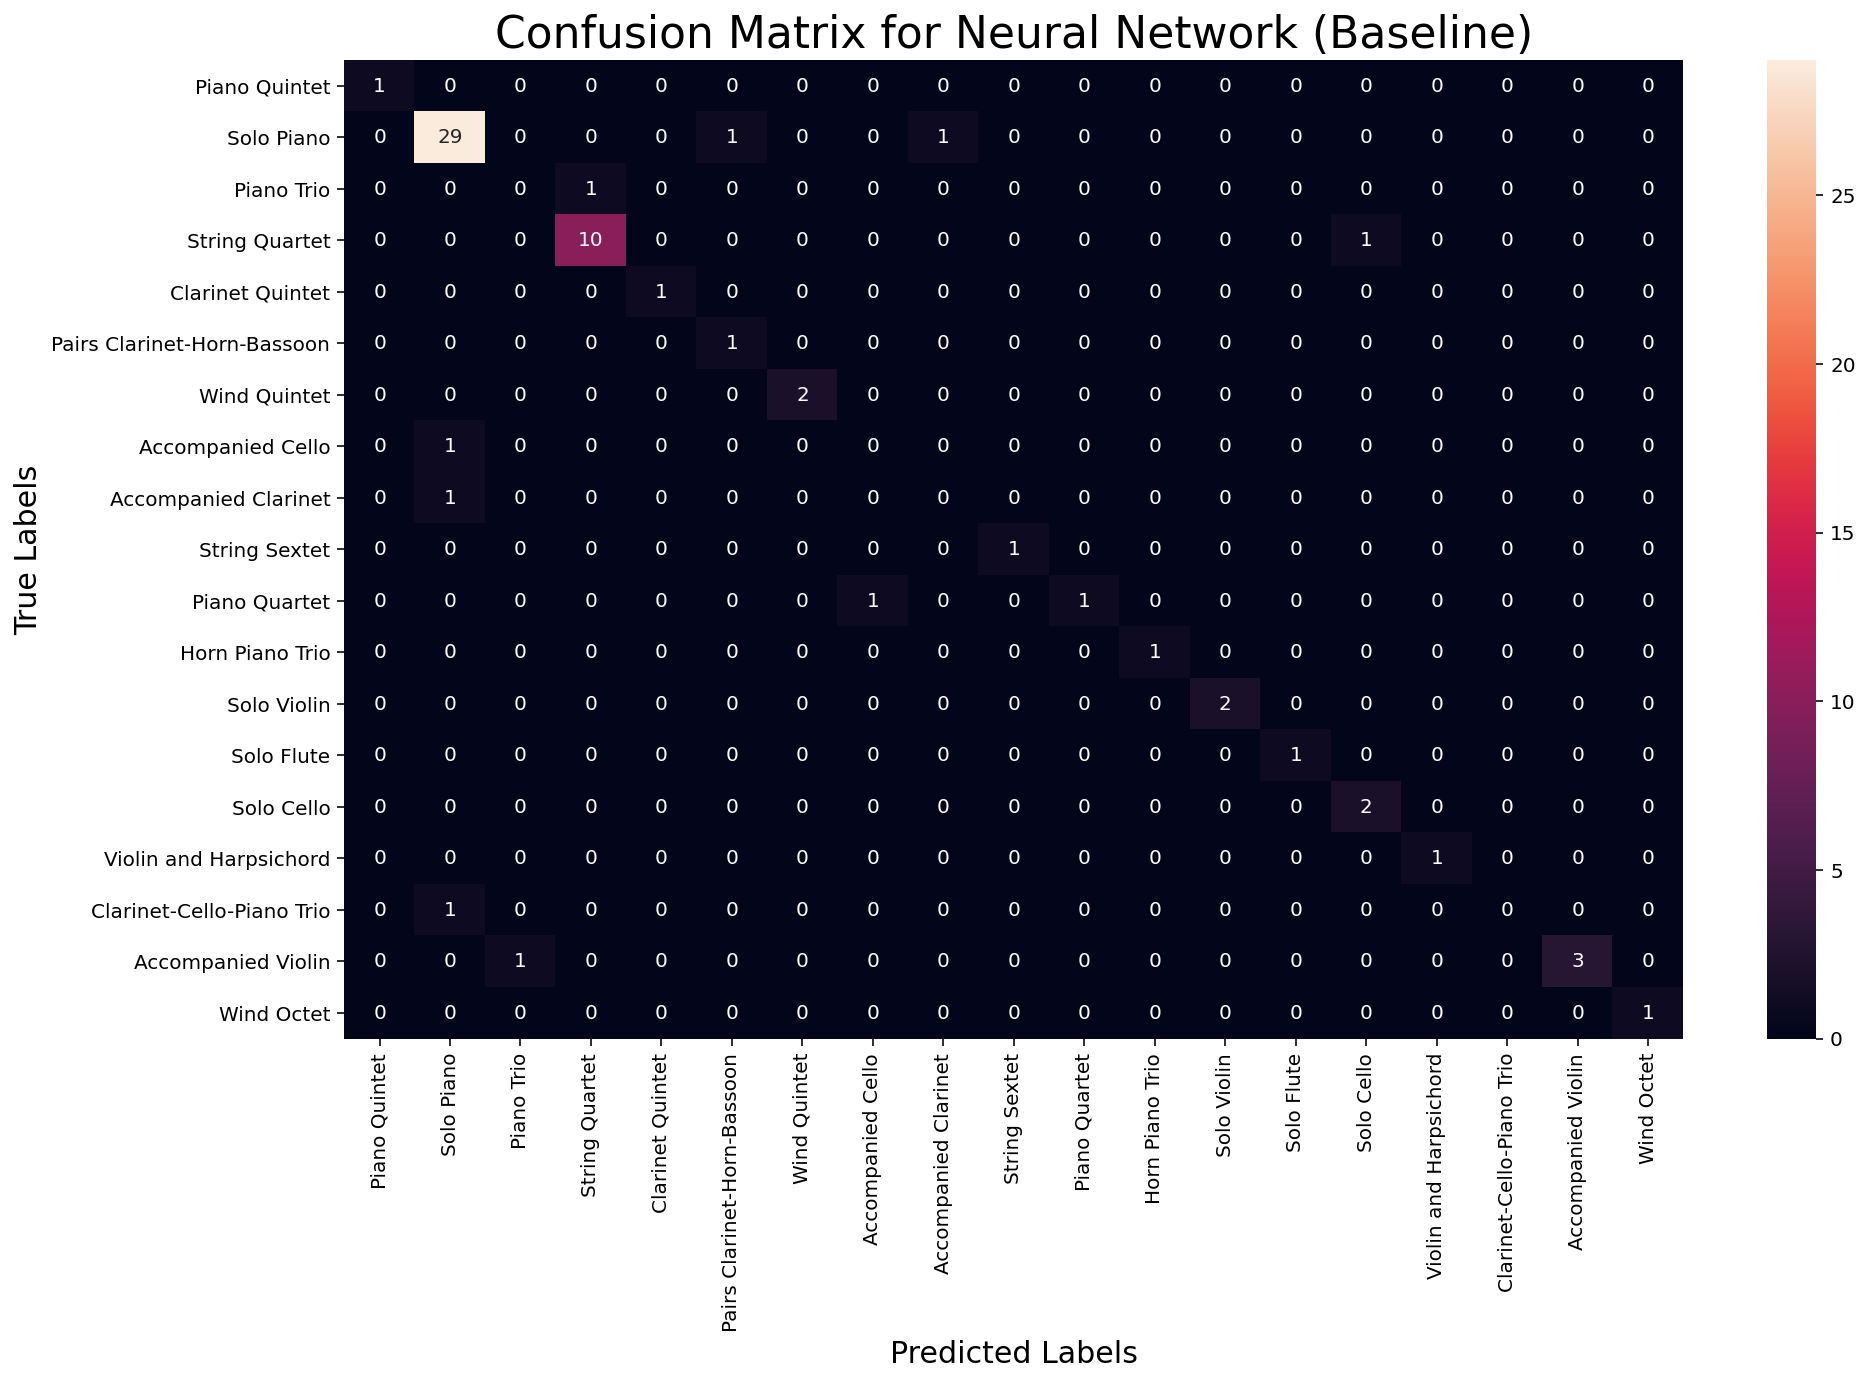

In [23]:
ensemble_list = ['Piano Quintet','Solo Piano','Piano Trio','String Quartet','Clarinet Quintet','Pairs Clarinet-Horn-Bassoon',
                'Wind Quintet','Accompanied Cello','Accompanied Clarinet','String Sextet',
                'Piano Quartet','Horn Piano Trio','Solo Violin','Solo Flute','Solo Cello','Violin and Harpsichord',
                'Clarinet-Cello-Piano Trio','Accompanied Violin','Wind Octet']
df_cm = pd.DataFrame(confusion_matrix(np.array(y_test_w), preds), index = ensemble_list,
                  columns = ensemble_list)
plt.figure(figsize = (15,9))
plt.title('Confusion Matrix for Neural Network (Baseline)',fontsize=22)
sns.heatmap(df_cm, annot=True)
plt.ylabel('True Labels',fontsize=15)
plt.xlabel('Predicted Labels',fontsize=15)
# plt.savefig('../output/plots/confusion_matrix_heatmap_nn.png')

#### Error Analysis : 
- In terms of absolute number, one of the most commonly misclassified ensembles was "Accompanied Violin" which comprises violin and piano. These were misclassified as Solo Piano or Piano Trio. 
- Note that due to SMOTE's effect of removing samples with low frequency (<6) in the train set but not modifying the test set, 30% of the misclassifications in the test set were because these had been removed from the train. This is expected and is a reasonable compromise for generating a balanced dataset for training purposes.

### Random Forest - w/SMOTE

In [24]:
# todo: I think we need to re-import the data for this cell, if this is run multiple times then y_train_w gets overwritten
y_train_w = pd.read_csv('../data/y_train_w.csv',index_col = 0)

#Drop any ensemble types with counts below 6. This because Expected n_neighbors <= n_samples,  
#but n_samples = 3, n_neighbors = 6
counts = y_train_w['ensemble'].value_counts()
X_train_w = X_train_w[~y_train_w['ensemble'].isin(counts[counts < 6].index)]
y_train_w = y_train_w[~y_train_w['ensemble'].isin(counts[counts < 6].index)]

# Fit and apply the transform
X_SMOTE_w, y_SMOTE_w = SMOTE(random_state=101).fit_resample(X_train_w, y_train_w)

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=1)
rf.fit(X_SMOTE_w, y_SMOTE_w)
predictions = rf.predict(X_test_w)
f1 = f1_score(y_test_w, predictions, average='weighted')
output_file = open('../output/test_set_output', 'a')
model_no = 'Model #: 2\n'
model_type = 'Random Forest (wav data only)\n'
model_scores = f'F1 Score: {f1}\n'
output_file.writelines([model_no, model_type, model_scores])
output_file.close()

print('Test Set F1 score = {:.2%}'.format(f1))

Test Set F1 score = 69.14%


### SVM - w/Hyperparameter Tuning + PCA + SMOTE

In [25]:
#Drop any ensemble types with counts below 6
counts = y_train_w['ensemble'].value_counts()
X_train_w_smote = X_train_w[~y_train_w['ensemble'].isin(counts[counts < 6].index)]
y_train_w_smote = y_train_w[~y_train_w['ensemble'].isin(counts[counts < 6].index)]

# fit and apply the transform
X_SMOTE, y_SMOTE = SMOTE().fit_resample(X_train_w_smote, y_train_w_smote.values.ravel())

#Perform PCA with 15 components
pca=PCA(n_components = 15)
pca.fit(X_SMOTE)
train_pca_w_smote = pca.transform(X_SMOTE)
X_test_w_pca = pca.transform(X_test_w)


from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': np.logspace(-4, 4, 20), 
              'gamma': np.logspace(-3, 2, 6),
              'kernel': ['linear','rbf','poly']} 
  
grid = GridSearchCV(SVC(), param_grid , cv=5)
  
# fitting the model for grid search
grid.fit(train_pca_w_smote, y_SMOTE)

#Create SVM model with best hyperparameters, PCA and SMOTE

svm = make_pipeline(SVC(kernel=grid.best_params_['kernel'], C = grid.best_params_['C'] , gamma=grid.best_params_['gamma']))
svm.fit(train_pca_w_smote, y_SMOTE)
predictions = svm.predict(X_test_w_pca)
f1 = f1_score(y_test_w, predictions, average='weighted')
output_file = open('../output/test_set_output', 'a')
model_no = 'Model #: 3\n'
model_type = 'SVM - Spectral - w/Hyperparameter Tuning + PCA + SMOTE (wav data only)\n'
model_scores = f'F1 Score: {f1}\n'
output_file.writelines([model_no, model_type, model_scores])
output_file.close()

print("Test Set F1-score: {:.2%}".format(f1))


Test Set F1-score: 71.69%


### SVM - w/Hyperparameter Tuning + PCA + SMOTE + StandardScaler	

In [26]:
#### Standard Scaler Application

#Perform PCA with 15 components
pca=PCA(n_components = 15)
pca.fit(X_SMOTE)
train_pca_w_smote = pca.transform(X_SMOTE)
X_test_w_pca = pca.transform(X_test_w)


#Create SVM model with best hyperparameters, PCA and SMOTE and StandardScaler

svm = make_pipeline(StandardScaler() ,SVC(kernel=grid.best_params_['kernel'], C = grid.best_params_['C'] , gamma=grid.best_params_['gamma']))
svm.fit(train_pca_w_smote, y_SMOTE)


predictions = svm.predict(X_test_w_pca)
f1 = f1_score(y_test_w, predictions,average='weighted')
output_file = open('../output/test_set_output', 'a')
model_no = 'Model #: 4\n'
model_type = 'SVM - Spectral - w/Hyperparameter Tuning + PCA + SMOTE + StandardScaler (wav data only)\n'
model_scores = f'F1 Score: {f1}\n'
output_file.writelines([model_no, model_type, model_scores])
output_file.close()
print("Test Set F1-score: {:.2%}".format(f1))


Test Set F1-score: 70.35%


### Logistic Regression - Baseline

In [27]:
#Create Baseline Logistic Model
lr = LogisticRegression(C = 0.5, solver='liblinear', multi_class='auto')
lr.fit(np.array(X_train_w), np.array(y_train_w))
predictions = lr.predict(X_test_w)
f1 = f1_score(y_test_w, predictions,average='weighted')
output_file = open('../output/test_set_output', 'a')
model_no = 'Model #: 5\n'
model_type = 'Logistic Regression - Spectral - Baseline (wav data only)\n'
model_scores = f'F1 Score: {f1}\n'
output_file.writelines([model_no, model_type, model_scores])
output_file.close()
print("Test Set F1-score: {:.2%}".format(f1))


Test Set F1-score: 72.76%


### SVM - Spectral - w/Hyperparameter Tuning

In [28]:
#Find best hyperparameters
param_grid = {'C': np.logspace(-4, 4, 20), 
              'gamma': np.logspace(-3, 2, 6),                     
              'kernel': ['linear','rbf','poly']} 
  
grid = GridSearchCV(SVC(), param_grid, cv=5)
  
# fitting the model for grid search
grid.fit(X_train_w, y_train_w.values.ravel())

#Create Model with best hyperparameters

svm = make_pipeline(SVC(kernel=grid.best_params_['kernel'], C = grid.best_params_['C'] , gamma=grid.best_params_['gamma']))
svm.fit(X_train_w, y_train_w.values.ravel())
predictions = svm.predict(X_test_w)
f1 = f1_score(y_test_w, predictions,average='weighted')
output_file = open('../output/test_set_output', 'a')
model_no = 'Model #: 6\n'
model_type = 'SVM - Spectral - w/Hyperparameter Tuning (wav data only)\n'
model_scores = f'F1 Score: {f1}\n'
output_file.writelines([model_no, model_type, model_scores])
output_file.close()
print("Test Set F1-score: {:.2%}".format(f1))

Test Set F1-score: 70.17%


### SVM - Spectral - W/Hyperparameter Tuning + PCA

In [29]:
#Perform PCA with 15 components
pca=PCA(n_components = 15)
pca.fit(X_train_w)
train_pca_w = pca.transform(X_train_w)
X_test_w_pca = pca.transform(X_test_w)

from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': np.logspace(-4, 4, 20), 
              'gamma': np.logspace(-3, 2, 6),
              'kernel': ['linear','rbf','poly']} 
  
grid = GridSearchCV(SVC(), param_grid , cv=5)
  
# fitting the model for grid search
grid.fit(train_pca_w, y_train_w.values.ravel())

#Create Model with best hyperparameters and PCA
svm = make_pipeline(SVC(kernel=grid.best_params_['kernel'], C = grid.best_params_['C'] , gamma=grid.best_params_['gamma']))
svm.fit(train_pca_w, y_train_w.values.ravel())
predictions = svm.predict(X_test_w_pca)
f1 = f1_score(y_test_w, predictions,average='weighted')
output_file = open('../output/test_set_output', 'a')
model_no = 'Model #: 7\n'
model_type = 'SVM - Spectral - W/Hyperparameter Tuning + PCA (wav data only)\n'
model_scores = f'F1 Score: {f1}\n'
output_file.writelines([model_no, model_type, model_scores])
output_file.close()
print("Test Set F1-score: {:.2%}".format(f1))


Test Set F1-score: 66.30%


### Random Forest - Baseline

In [30]:
rf = RandomForestClassifier()
rf.fit(X_train_w, y_train_w)
predictions = rf.predict(X_test_w)
f1 = f1_score(y_test_w, predictions,average='weighted')
output_file = open('../output/test_set_output', 'a')
model_no = 'Model #: 8\n'
model_type = 'Random Forest - Midi - Baseline (wav data only)\n'
model_scores = f'F1 Score: {f1}\n'
output_file.writelines([model_no, model_type, model_scores])
output_file.close()
print("Test Set F1-score: {:.2%}".format(f1))

Test Set F1-score: 65.93%


### Decision Tree - Baseline

In [31]:
dt = DecisionTreeClassifier()
dt.fit(X_train_w, y_train_w)
predictions = dt.predict(X_test_w)
f1 = f1_score(y_test_w, predictions, average = 'weighted')
output_file = open('../output/test_set_output', 'a')
model_no = 'Model #: 9\n'
model_type = 'Decision Tree Baseline Model (wav data only)\n'
model_scores = f'F1 Score: {f1}\n'
output_file.writelines([model_no, model_type, model_scores])
output_file.close()
print("Test Set F1-score: {:.2%}".format(f1))

Test Set F1-score: 70.82%


### SVM - w/Hyperparameter Tuning + PCA + SMOTE + MinMaxScaler

In [32]:
#### MinMaxScaler Application

#Perform PCA with 15 components
pca=PCA(n_components = 15)
pca.fit(X_SMOTE)
train_pca_w_smote = pca.transform(X_SMOTE)
X_test_w_pca = pca.transform(X_test_w)


#Create SVM model with best hyperparameters, PCA and SMOTE and MinMaxScaler

svm = make_pipeline(MinMaxScaler() ,SVC(kernel=grid.best_params_['kernel'], C = grid.best_params_['C'] , gamma=grid.best_params_['gamma']))
svm.fit(train_pca_w_smote, y_SMOTE)
predictions = svm.predict(X_test_w_pca)
f1 = f1_score(y_test_w, predictions, average = 'weighted')

#Apply 5 fold cross validation scoring to make sure results are reliable
# Print and save output
output_file = open('../output/test_set_output', 'a')
model_no = 'Model #: 10\n'
model_type = 'SVM with Hyperparameter tuning, PCA, SMOTE, and Min Max Scaler (wav data only)\n'
model_scores = f'F1 Score: {f1}\n'
output_file.writelines([model_no, model_type, model_scores])
output_file.close()
print("Test Set F1-score: {:.2%}".format(f1))

Test Set F1-score: 39.48%


### Naive Bayes - Baseline

In [33]:
gnb = GaussianNB()
gnb.fit(X_train_w,y_train_w)
predictions = gnb.predict(X_test_w)
f1 = f1_score(y_test_w, predictions, average = 'weighted')

output_file = open('../output/test_set_output', 'a')
model_no = 'Model #: 11\n'
model_type = 'Naive Bayes Baseline Model (wav data only)\n'
model_scores = f'F1 Score: {f1}\n'
output_file.writelines([model_no, model_type, model_scores])
output_file.close()
print("Test Set F1-score: {:.2%}".format(f1))

Test Set F1-score: 60.57%


### Logistic Regression - w/PCA

In [34]:
pca = PCA(n_components = 5)
pca.fit(X_train_w)
X_train_pca = pca.transform(X_train_w)
X_test_w_pca = pca.transform(X_test_w)

lr = LogisticRegression(C = 0.5, max_iter = 100,solver='liblinear', multi_class='auto')
lr.fit(X_train_pca,y_train_w)
predictions = lr.predict(X_test_w_pca)
f1 = f1_score(y_test_w, predictions, average = 'weighted')

output_file = open('../output/test_set_output', 'a')
model_no = 'Model #: 12\n'
model_type = 'Logistic Regression with PCA (wav data only)\n'
model_scores = f'F1 Score: {f1}\n'
output_file.writelines([model_no, model_type, model_scores])
output_file.close()
print("Test Set F1-score: {:.2%}".format(f1))

Test Set F1-score: 54.79%


### SVM - Baseline

In [35]:
#Create baseline SVM model with Spectral Data

svm = make_pipeline(SVC())
svm.fit(X_train_w, y_train_w.values.ravel())
predictions = svm.predict(X_test_w)
f1 = f1_score(y_test_w, predictions, average = 'weighted')

# prints and saves output
output_file = open('../output/test_set_output', 'a')
model_no = 'Model #: 13\n'
model_type = 'SVM Baseline Model (wav data only)\n'
model_scores = f'F1 Score: {f1}\n'
output_file.writelines([model_no, model_type, model_scores])
output_file.close()
print("Test Set F1-score: {:.2%}".format(f1))

Test Set F1-score: 47.05%


## Final Test Results
|       |               Model |                                          Model Variant | Mean CV F1 Score | Test Set F1 Score |
|-------|--------------------:|-------------------------------------------------------:|-----------------:|-------------------|
| 6.1.1 |      Neural Network |                       Baseline (ADAM, 5 Hidden Layers) |             100% | 73.1%             |
| 4.1.2 |       Random Forest |                                                w/SMOTE |           99.60% | 69.14%            |
| 5.1.4 |                 SVM |                  w/Hyperparameter Tuning + PCA + SMOTE |           99.40% | 72.81%            |
| 5.1.6 |                 SVM | w/Hyperparameter Tuning + PCA + SMOTE + StandardScaler |           96.30% | 68.41%            |
| 1.1.1 | Logistic Regression |                                               Baseline |           94.40% | 72.76%            |
| 5.1.2 |                 SVM |                                w/Hyperparameter Tuning |           90.40% | 70.17%            |
| 5.1.3 |                 SVM |                          w/Hyperparameter Tuning + PCA |           89.10% | 66.30%            |
| 4.1.1 |       Random Forest |                                               Baseline |           78.60% | 64.01%            |
| 3.1.1 |       Decision Tree |                                               Baseline |           71.40% | 68.29%            |
| 5.1.5 |                 SVM |   w/Hyperparameter Tuning + PCA + SMOTE + MinMaxScaler |           70.20% | 34.85%            |
| 2.1.1 |         Naive Bayes |                                               Baseline |           66.70% | 60.57%            |
| 1.1.2 | Logistic Regression |                                                  w/PCA |           59.20% | 54.79%            |
| 5.1.1 |                 SVM |                                               Baseline |           54.20% | 47.05%            |

# Conclusion:
Best performing model is Neural Network with F1-Score of 73.1%, followed by SVM F1-Score 72.81% and Logistic Regression at 72.76%. This shows that our models are able to sucessfully generalize.

We recognize that the test result is lower than the result on development set cross validation. That is expected because SMOTE algorithm removes low frequency samples (below 6) on the training but requires that no modifications be done on the test data. As a result, ensemble types which have been removed from the train set but still exist in the test set will be misclassified. In return, the model receives more simulated data for training to improve its performance. A balance needs to be struck there.

In comparing to current research in this domain, our project's dataset has a lot more complexity with 21 instrument ensemble combinations and polyphonic music from multiple instruments. Whereas existing research conducted was for soundbytes of 10 seconds for single instruments where 99%-100% accuracy was achieved for 4-10 types of instruments.

We hope that our research can help contribute to business and academic efforts in this area due to its complexity being most similar to music that is typically encountered in real life business scenarios e.g. when users play music from playlists. 

We envision that our work can be used to identify musical attributes (such as combinations of instruments) that music lovers prefer and be used by companies in the tech and music industry to recommend music that meets user tastes and preferences.



